**The dataset contains customer information of a AUTO insurance company located in the US.**


The observations include:
state: state of customer

coverage: type of insurance coverage

education: customer education level

emp_status: employment status

gender: customer gender

income: income of customer

loc_code: living area type

m_status: Marital status

m_Prem: monthly insurance premium

mo_claim: months since last insurance premium

mo_claim: months since last insurance claim

mo_policy: customer months since policy inception

n_complaints: number of unresolved complaints

n_policies: no of policies

p_type: type of insurance policy
s_channel: channel by which customer was aquired

t_claims: total claims amount

v_class: vehicle type

v_size: vehicle size

clv: Customer lifetime value

The objective of the project is to build a regression model that takes input variables to predict CLV.


In [ ]:
import pandas as pd
data = pd.read_excel("Customer-Lifetime-Value-Prediction.xlsx", sheet_name = "CLV")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         6817 non-null   object 
 1   Coverage      6817 non-null   object 
 2   Education     6817 non-null   object 
 3   Emp_Status    6817 non-null   object 
 4   Gender        6817 non-null   object 
 5   Loc_Code      6817 non-null   object 
 6   M_Status      6817 non-null   object 
 7   V_Class       6817 non-null   object 
 8   V_Size        6817 non-null   object 
 9   P_Type        6817 non-null   object 
 10  S_Channel     6817 non-null   object 
 11  T_Claims      6817 non-null   float64
 12  Mo_Policy     6817 non-null   int64  
 13  M_Prem        6817 non-null   int64  
 14  N_Policies    6817 non-null   int64  
 15  Income        6817 non-null   int64  
 16  N_Complaints  6817 non-null   int64  
 17  CLV           6817 non-null   int64  
dtypes: float64(1), int64(6), obj

There are 19 attributes and 6817 observations

# Part a) Explain dataset in own words:


# Part b) Numerical summaries of the dataset

In [ ]:
print("----------------Numerical summaries for quantitative data--------------\n")
data.describe(include = 'all')



----------------Numerical summaries for quantitative data--------------



,State,Coverage,Education,Emp_Status,Gender,Loc_Code,M_Status,V_Class,V_Size,P_Type,S_Channel,T_Claims,Mo_Policy,M_Prem,N_Policies,Income,N_Complaints,CLV
count,6817,6817,6817,6817,6817,6817,6817,6817,6817,6817,6817,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
unique,5,3,5,4,2,3,3,6,3,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,California,Basic,Bachelor,Employed,F,Suburban,Married,Four-Door Car,Medsize,Personal Auto,Agent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2346,4178,2037,5698,3523,3657,4522,3465,4827,5068,2573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377.840789,47.832624,92.963034,2.951005,50456.580461,0.381840,8130.234707
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.648952,27.895350,34.615160,2.390613,24305.956566,0.905048,6949.068193
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.099007,0.000000,61.000000,1.000000,10037.000000,0.000000,2120.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.100003,24.000000,68.000000,1.000000,28432.000000,0.000000,4091.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340.800000,48.000000,83.000000,2.000000,48081.000000,0.000000,5811.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,498.612632,71.000000,109.000000,4.000000,70187.000000,0.000000,9076.000000


In [ ]:
print("---------------Percentages for categorical data-----------------\n")
#loading categorical data from the dataset
cat_data = data.iloc[:,0:11]
for i in cat_data:
  print(data[i].value_counts(normalize = True) * 100)

---------------Percentages for categorical data-----------------

State
California    34.413965
Oregon        28.414258
Arizona       18.673903
Nevada         9.755024
Washington     8.742849
Name: proportion, dtype: float64
Coverage
Basic       61.287957
Extended    29.646472
Premium      9.065571
Name: proportion, dtype: float64
Education
Bachelor                29.881179
College                 29.470442
High School or Below    26.888661
Master                   9.520317
Doctor                   4.239401
Name: proportion, dtype: float64
Emp_Status
Employed         83.585155
Medical Leave     6.337098
Disabled          5.941030
Retired           4.136717
Name: proportion, dtype: float64
Gender
F    51.679624
M    48.320376
Name: proportion, dtype: float64
Loc_Code
Suburban    53.645299
Rural       24.424234
Urban       21.930468
Name: proportion, dtype: float64
M_Status
Married     66.334165
Divorced    17.060290
Single      16.605545
Name: proportion, dtype: float64
V_Class
Four-Doo

# Part c) Graphical summaries

Pie charts for categorical data

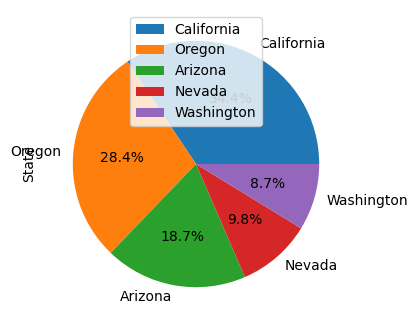

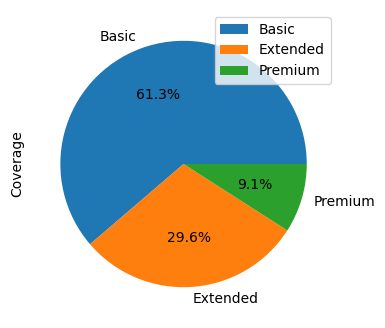

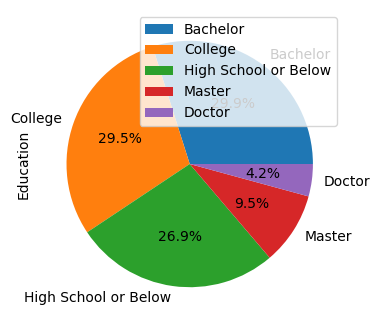

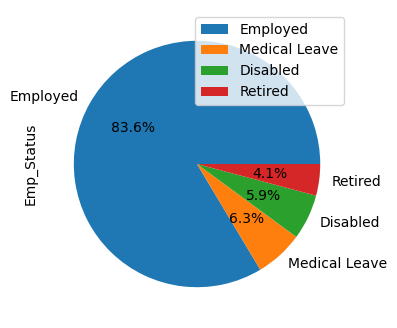

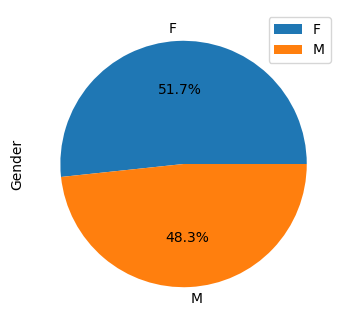

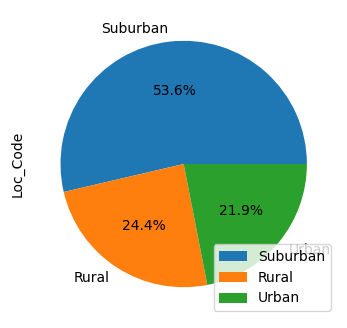

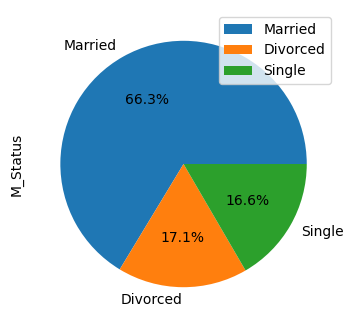

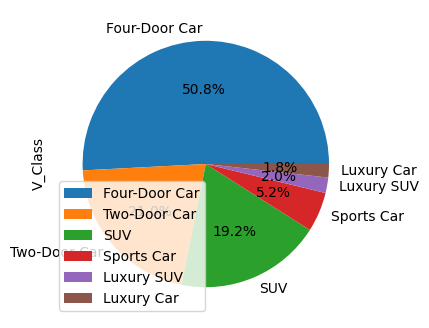

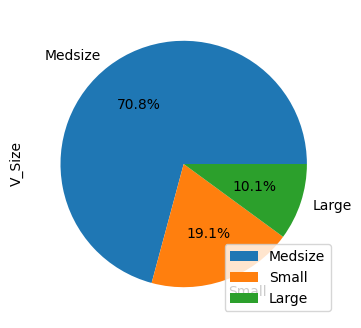

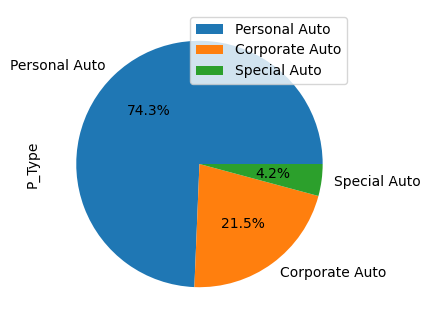

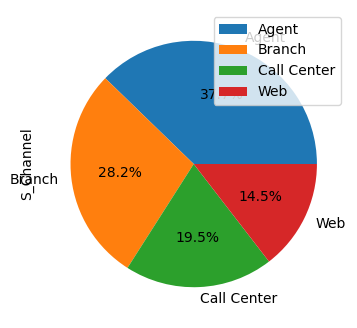

In [ ]:
for feature in cat_data.columns:
  abs_freq = cat_data[feature].value_counts()
  df2 = pd.DataFrame({feature :abs_freq})
  df2.plot.pie(y = feature, figsize= (4,4),autopct=('%1.1f%%'))



Bar charts for categorical data

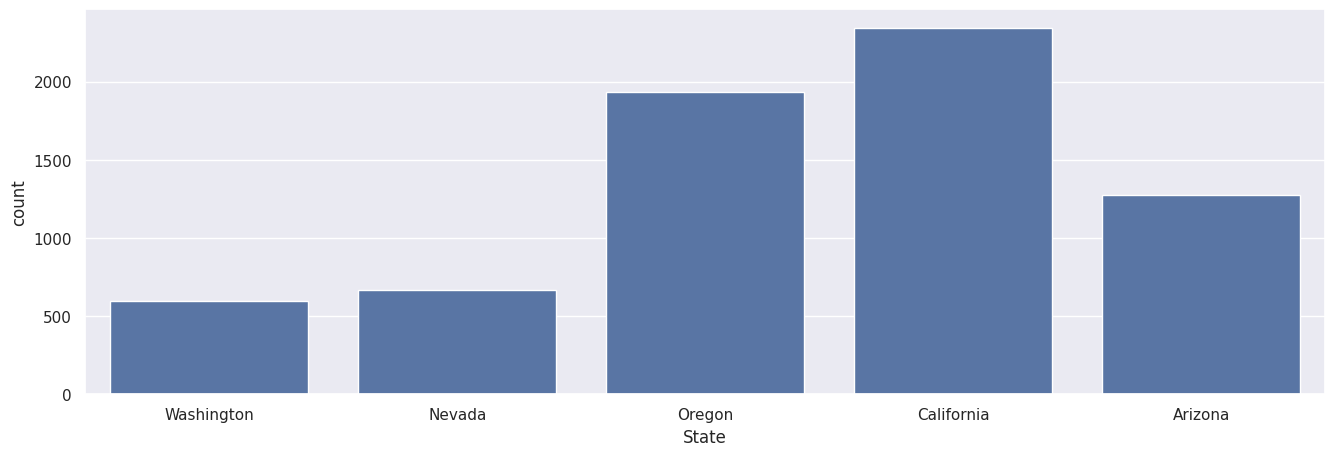

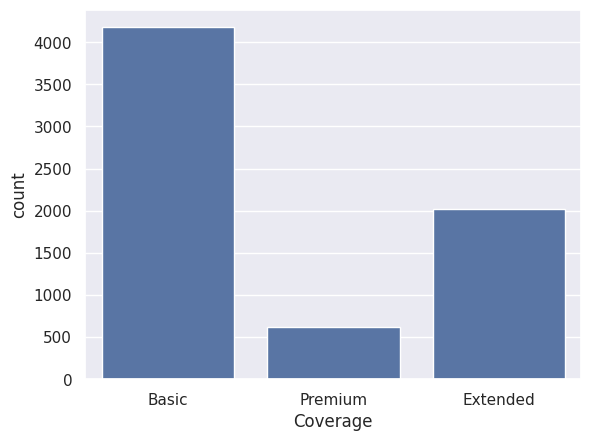

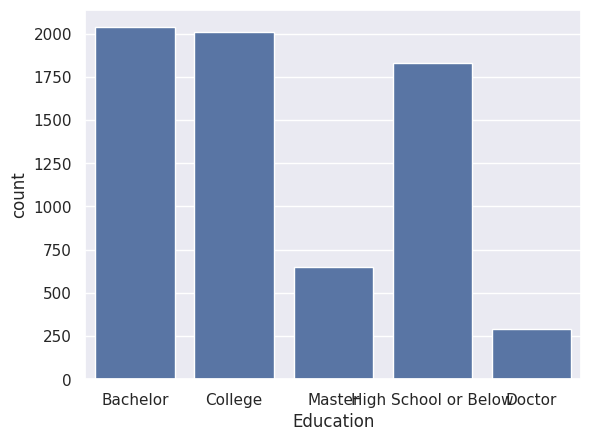

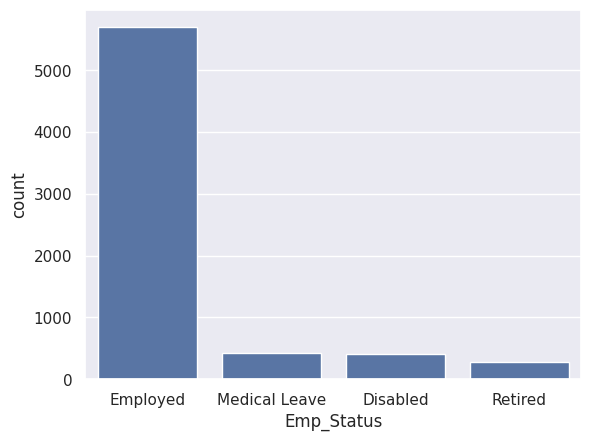

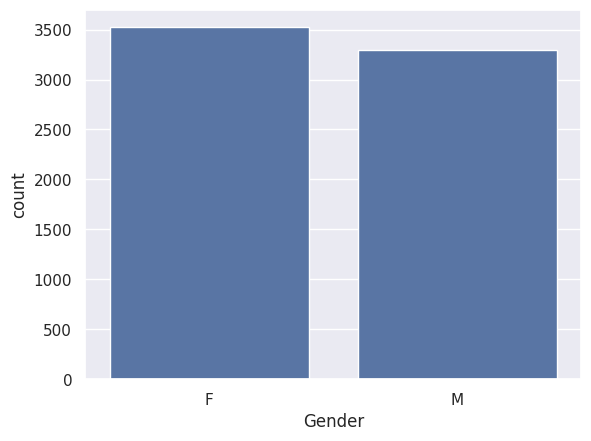

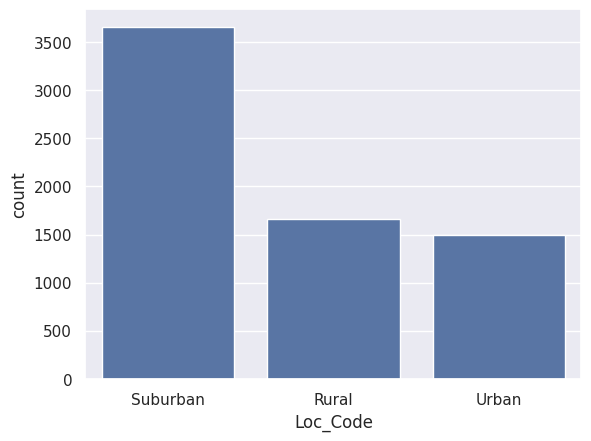

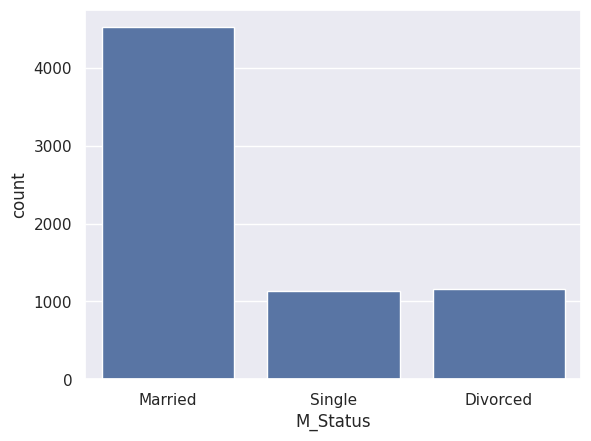

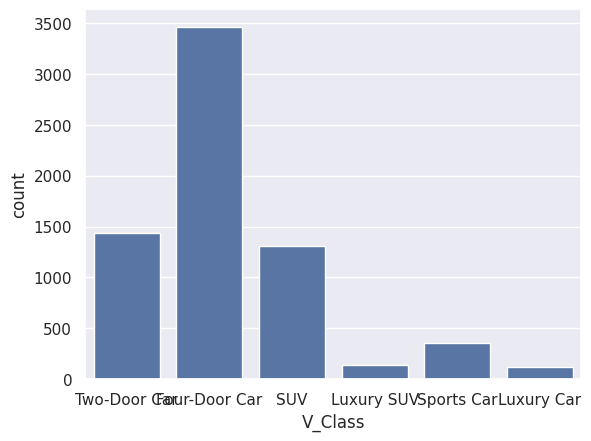

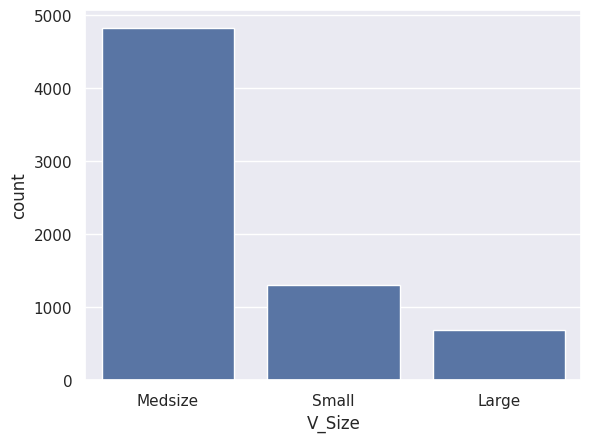

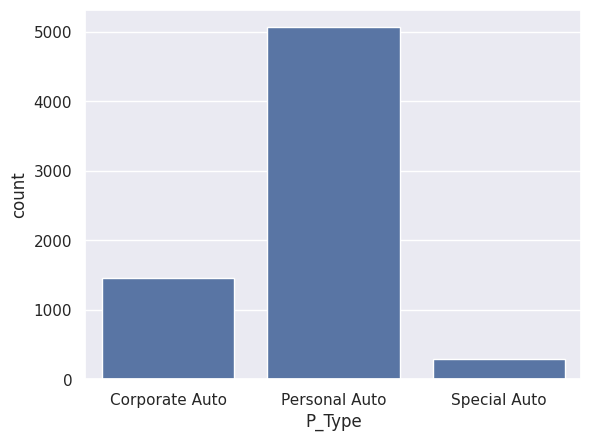

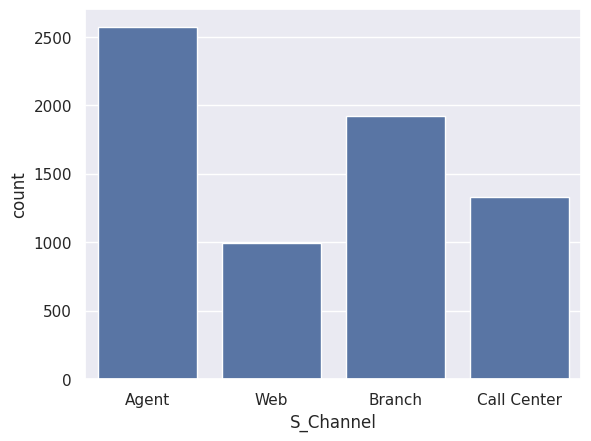

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

plt.figure(figsize = (16,5))
for feature in cat_data.columns:
  sns.countplot(x = feature, data = cat_data)
  plt.show()


Histograms for continuous numerical data

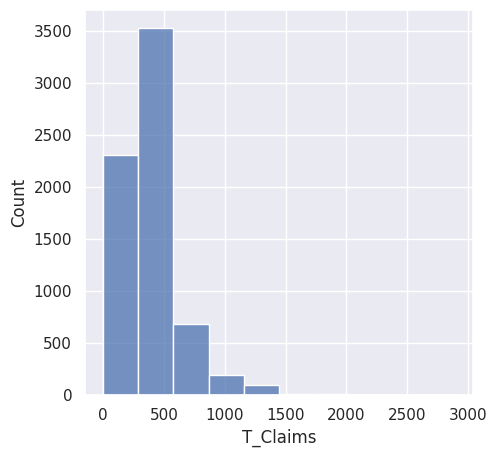

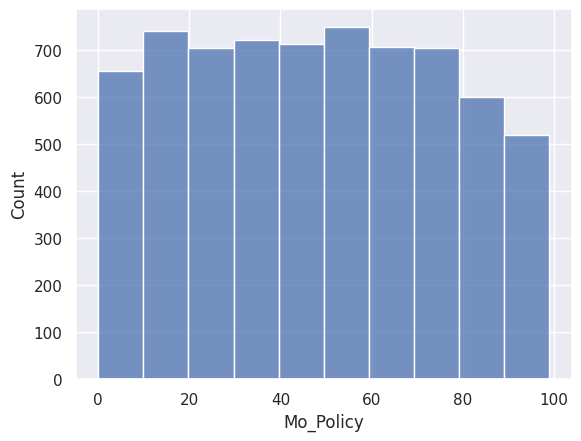

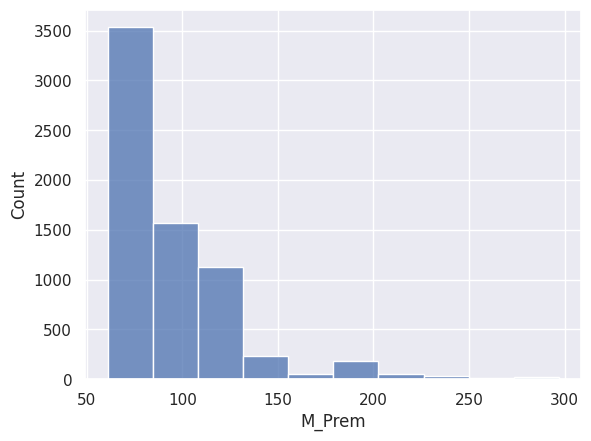

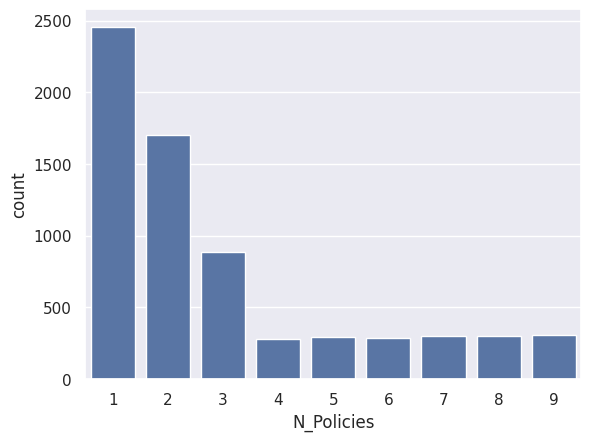

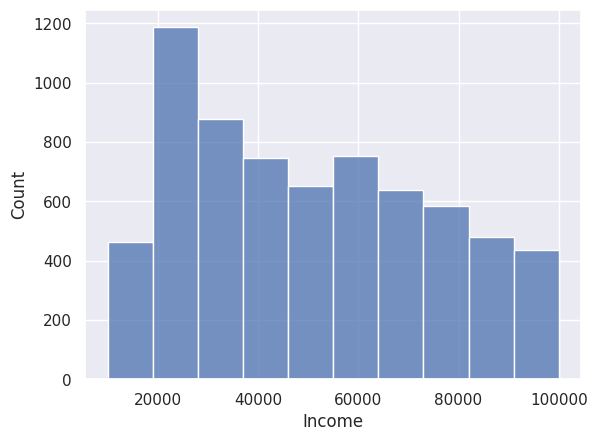

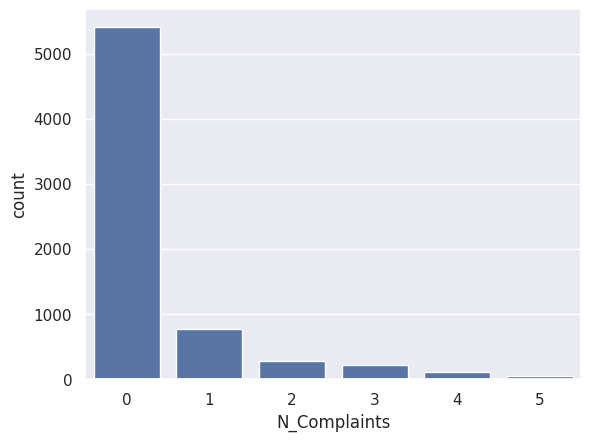

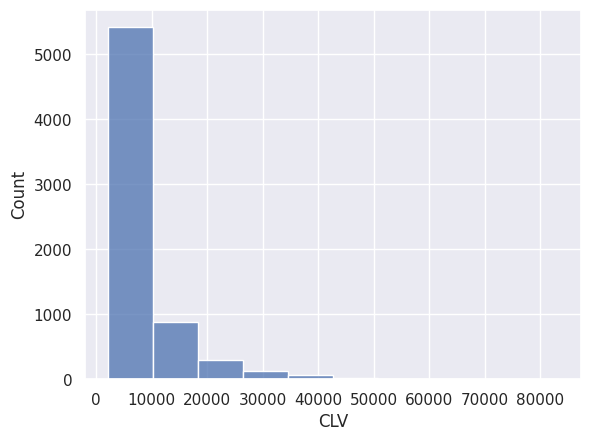

In [ ]:
plt.figure(figsize = (5,5))
num_data = data.select_dtypes(include=[int, float])
for feature in num_data:
  if (feature == 'N_Policies' or feature == "N_Complaints"):
    sns.countplot(x = feature, data = num_data)
    plt.show()
  else:
    sns.histplot(x = feature, data = num_data, bins = 10)
    plt.show()



Box plots

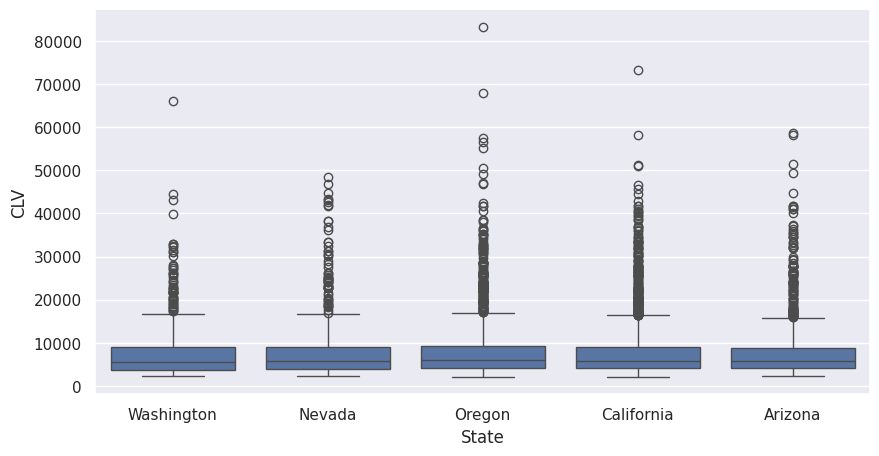

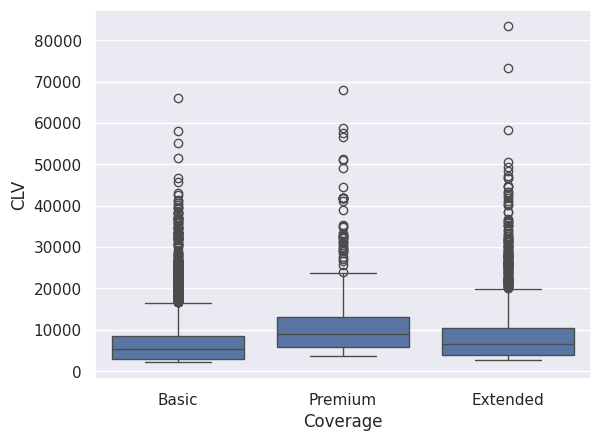

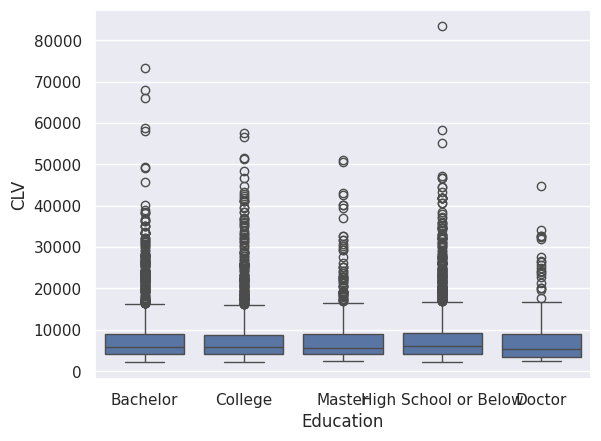

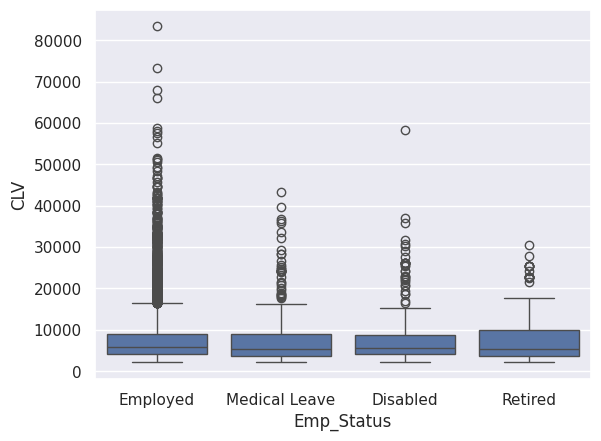

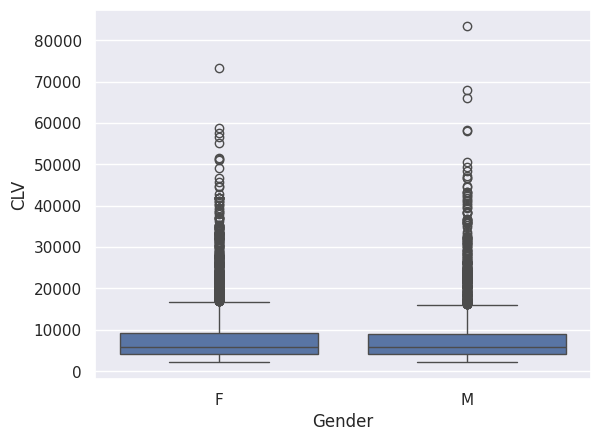

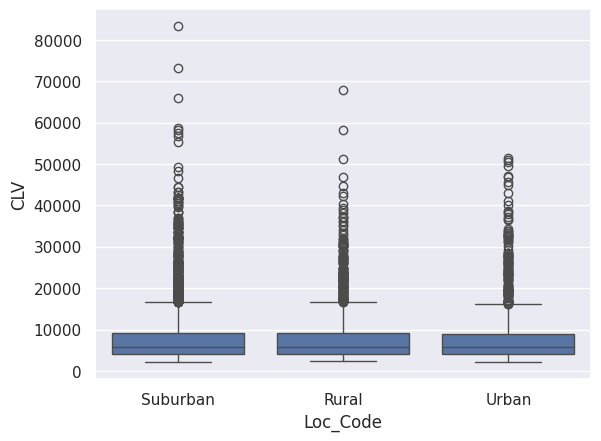

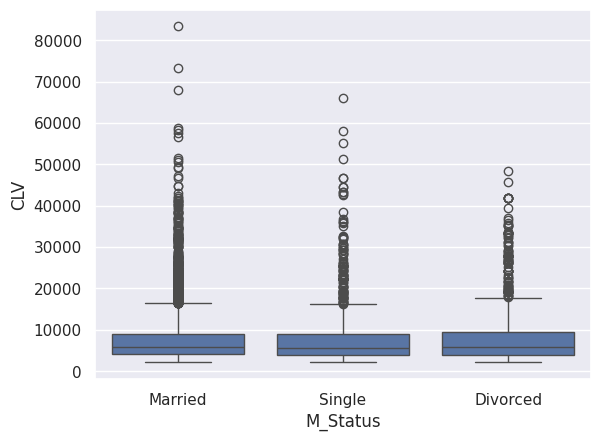

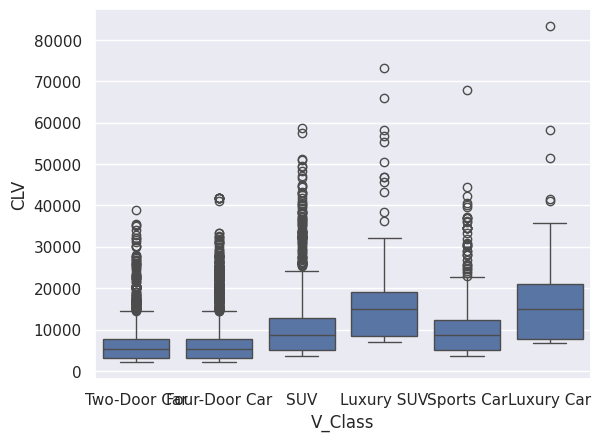

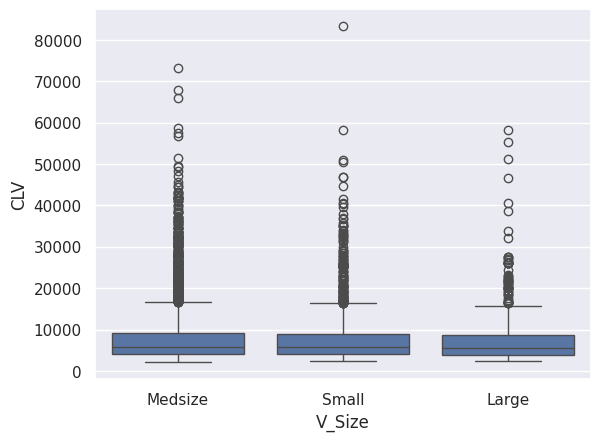

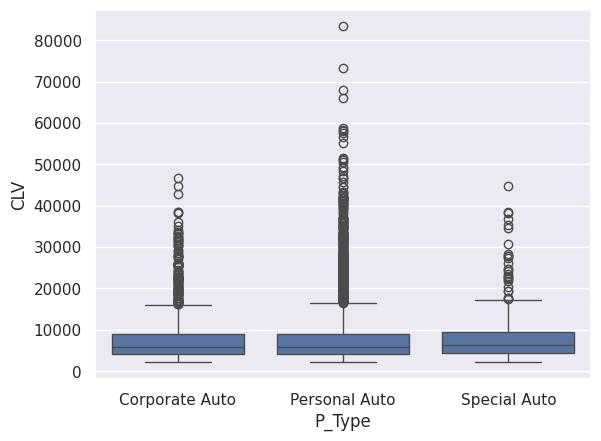

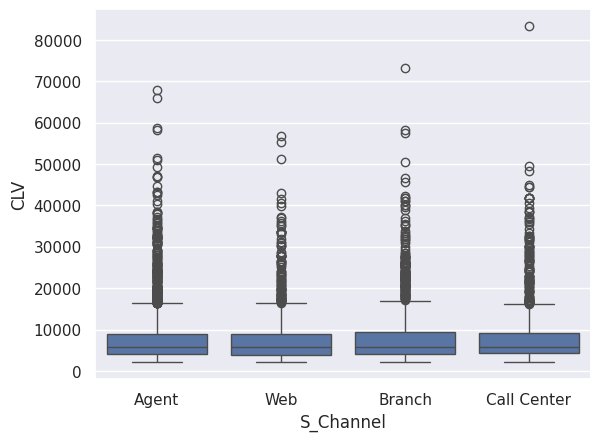

In [ ]:
sns.set(style = 'darkgrid')
plt.figure(figsize =(10,5))

for feature in cat_data.columns:
  sns.boxplot(data, y = 'CLV', x = feature)
  plt.show()

<Axes: >

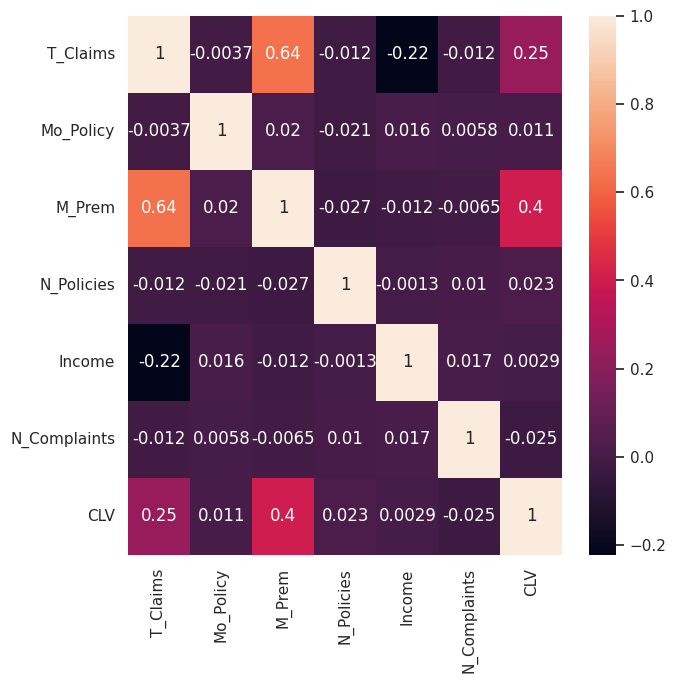

In [ ]:

plt.figure(figsize = (7,7))

sns.heatmap(data.corr(numeric_only=True),annot=True)

<Figure size 1500x1500 with 0 Axes>

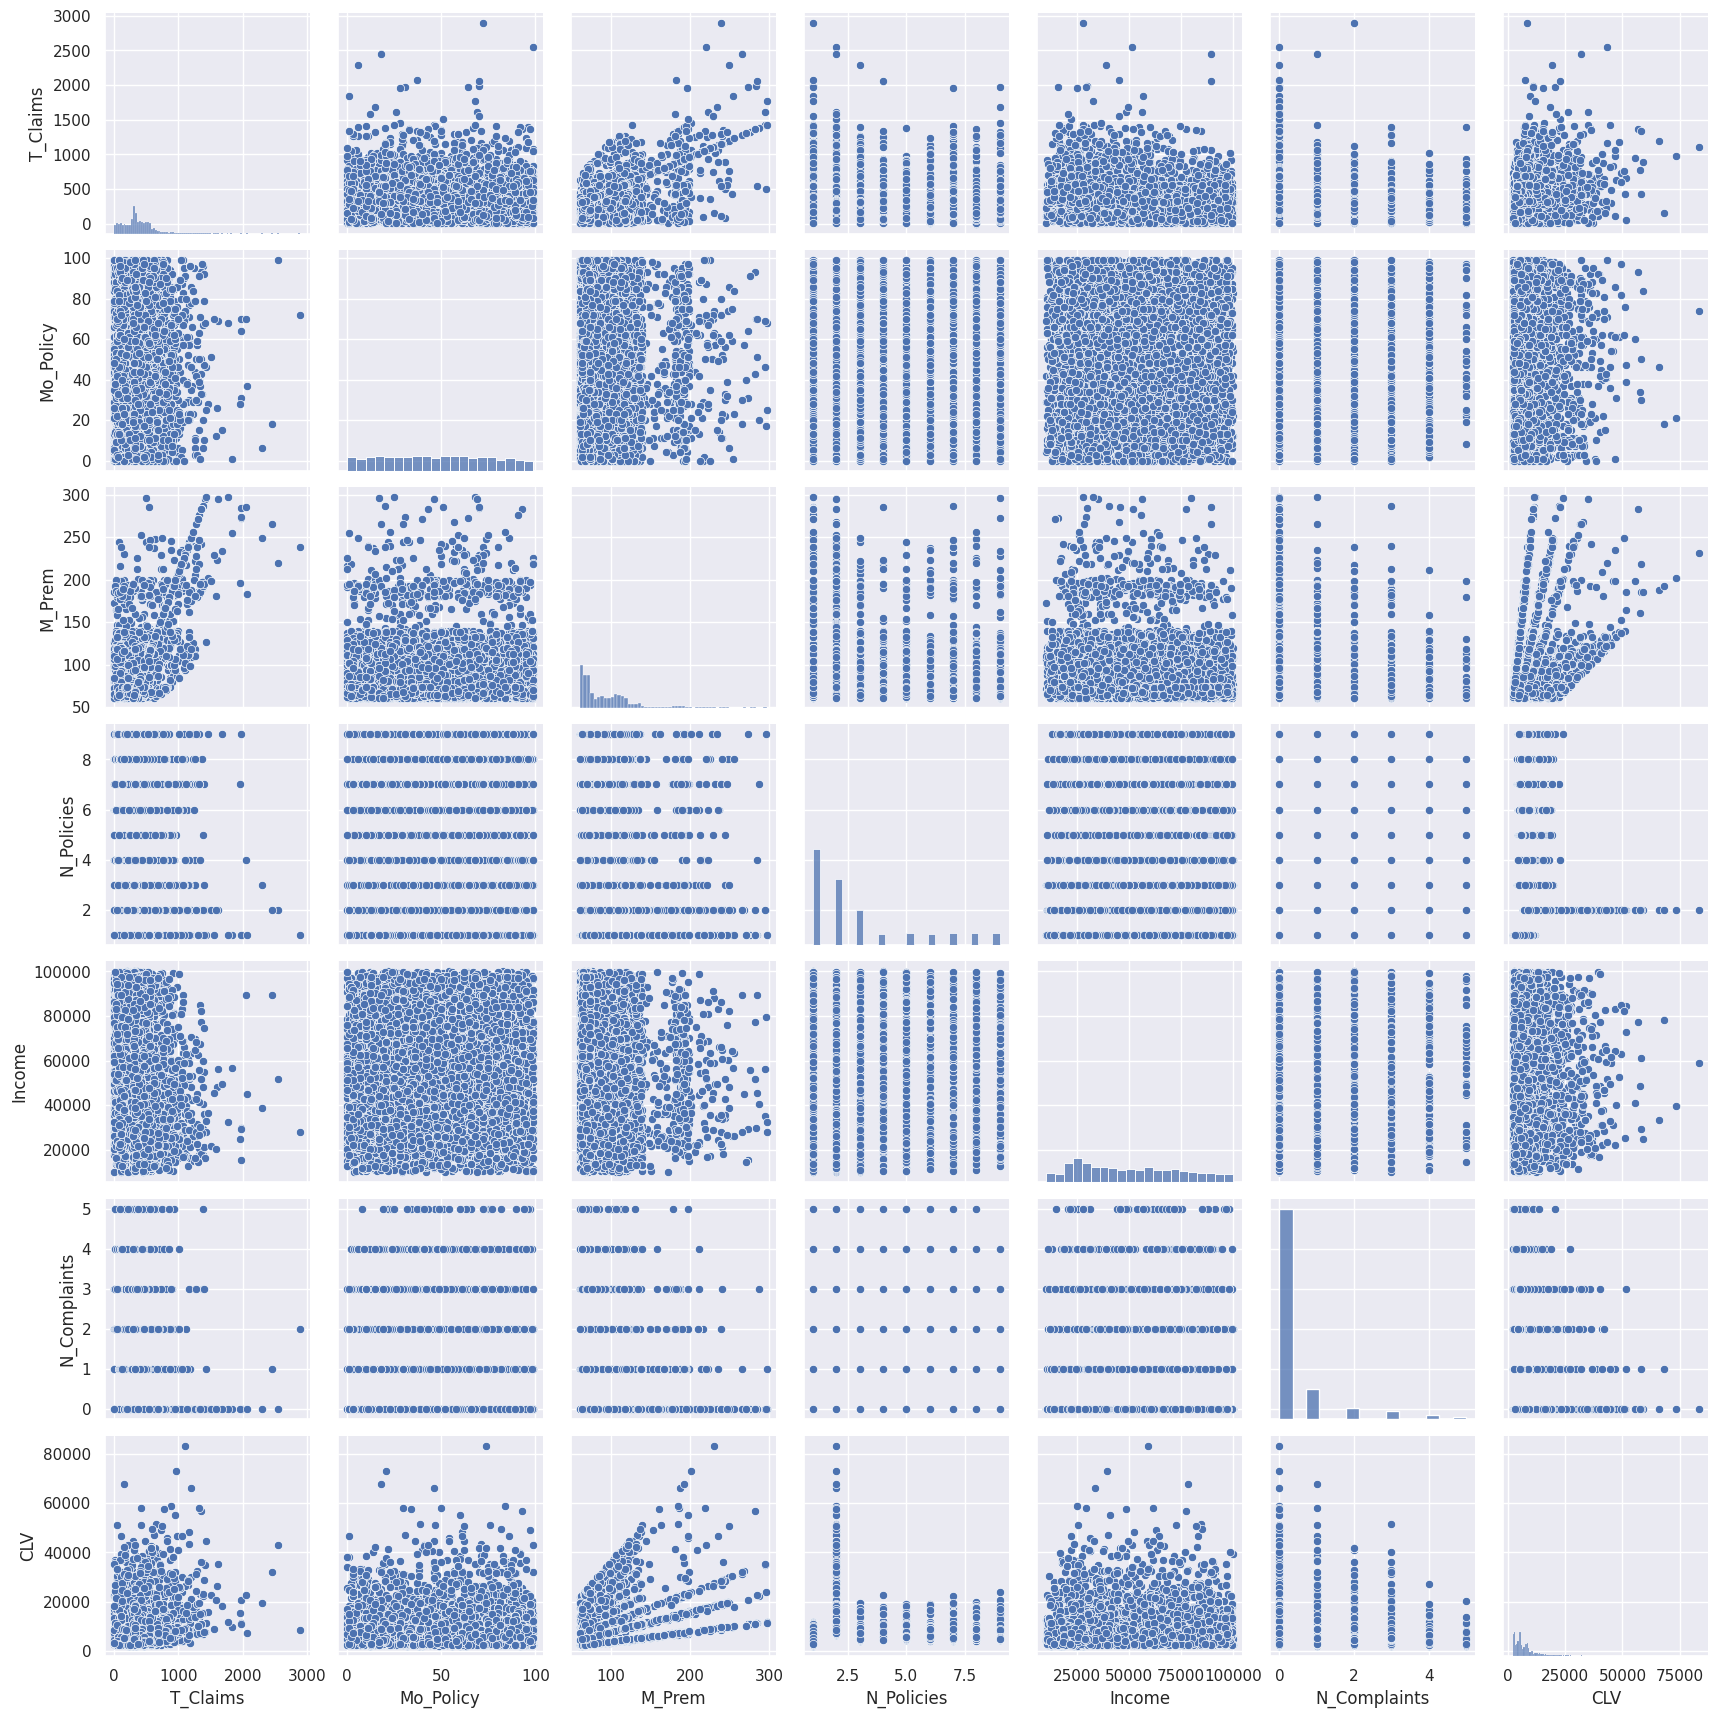

In [ ]:
data = pd.read_excel("Customer-Lifetime-Value-Prediction.xlsx", sheet_name = "CLV")

plt.figure(figsize = (15,15))


sns.pairplot(data)
plt.show()

#Part d) Comment on the numerical summaries

# Section 2 Preprocessing tasks

In [ ]:
import pandas as pd
data = pd.read_excel("Customer-Lifetime-Value-Prediction.xlsx", sheet_name = "CLV")

from sklearn import preprocessing
import numpy as np

#transforming categorical data in the dataframe
enc = preprocessing.OrdinalEncoder()
enc.fit(data.iloc[:,0:11])
data.iloc[:,0:11] = enc.transform(data.iloc[:,0:11])


arr = data.iloc[:,0:].to_numpy()


#normalizing entire dataframe

# min-max scaling
scaler = preprocessing.MinMaxScaler().fit(arr)
arr = scaler.fit_transform(arr)
#Zscore scaling
#scaler = preprocessing.StandardScaler().fit(arr)
#arr = scaler.fit_transform(arr)

X = arr[:,0:-1]


y = arr[:,-1]








# Section 3 splitting into testing and training data

In [ ]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split

#choose one of the following
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 20)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 40)

# Section 4 Regression

In [ ]:
#Choosing the regression model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor




regressor = LinearRegression()
#regressor = SVR(kernel = 'linear')
#regressor = SVR(kernel = 'poly')
#regressor = SVR(kernel = 'rbf')
#regressor = MLPRegressor(max_iter=10000, random_state=1)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)






Mean squared error (MSE): 0.01
Coefficient of determination(R squared):  0.18


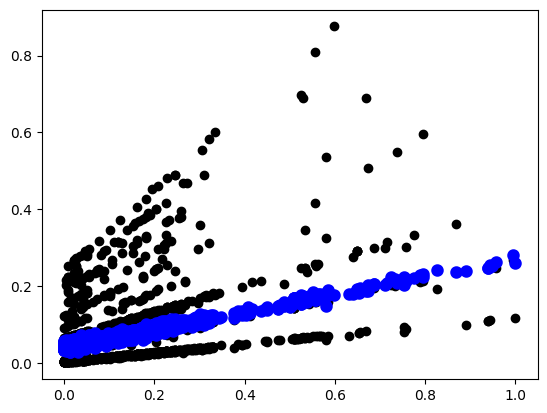

In [ ]:

#Evaluate regression model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

print("Mean squared error (MSE):", round (MSE,2))
print('Coefficient of determination(R squared): ', round(R2, 2) )

import matplotlib.pyplot as plt
import numpy as np

# Plot outputs
plt.scatter(X_test[:,13], y_test, color='black')
plt.scatter(X_test[:,13], y_pred, color="blue", linewidth=3)

Summary of regression tasks

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

data = pd.read_excel('Customer-Lifetime-Value-Prediction.xlsx',sheet_name = 'CLV')

#encoding categorical variables
enc = preprocessing.OrdinalEncoder()

enc.fit(data.iloc[:,0:11])
data.iloc[:,0:11] = enc.transform(data.iloc[:,0:11])

data_arr = data.to_numpy()

# data preprocessing


#applying transformations
for x_scaled in [preprocessing.StandardScaler(),preprocessing.MinMaxScaler()]:
    print("Normalizing using: ", str(x_scaled))
    print("-----------------------------------")
    x_scaled.fit(data_arr)
    data_arr = x_scaled.transform(data_arr)
    x_input = data_arr[:,0:-1]
    output = data_arr[:,-1]

    #creating the three data splits
    for split in [1, 20, 40]:
      X_train, X_test, y_train, y_test = train_test_split(x_input, output, test_size=0.30, random_state = split)
      #check the train and test data
      print('Split ', split)
      #print("The x_train data: \n", X_train)
      #print()
      #print("The x_test data: \n", X_test)
      #print()
      #print("The y_train data: \n", y_train)
      #print()
      #print("The y_test data: \n", y_test)
      #print()
      #print('')
      index = 0
      #chossing the regressor model
      for regressor in [LinearRegression(),SVR(kernel = 'poly'), SVR(kernel = 'rbf'), SVR(kernel = 'linear') ,MLPRegressor(max_iter = 10000, random_state = 1)]:
      #training the model
        print('using regressor ' + str(regressor))
        regressor.fit(X_train, y_train)
      #getting the coefficents and intercept if using linear regression

        if (index == 0):
          print("Coefficient: ", np.round(regressor.coef_, 2))#slope
          print("Intercept: ", np.round(regressor.intercept_, 2))#intercept
          print()
        index += 1


      #--------------------------------------------------
      #prediction of test result
        y_pred = regressor.predict(X_test)

        #print()

      #--------------------------------------------------
      #Model evaluation


        MSE = mean_squared_error(y_test, y_pred)
        R2 = r2_score(y_test, y_pred) #function r2_score takes the true labels (y_test) and the predicted ones (y_pred)

        print("Mean squared error (MSE): ", round(MSE, 2))
        print("Coefficient of determination (R squared): ", round(R2, 2))
        print("Coefficient of determination (R squared) using score function: ", round(regressor.score(X_test, y_test), 2) ) #function takes the x_test and y_test
        print()














Normalizing using:  StandardScaler()
-----------------------------------
Split  1
using regressor LinearRegression()
Coefficient:  [-0.   -0.02  0.02  0.   -0.01  0.01 -0.01  0.03  0.01  0.01  0.02 -0.02
 -0.    0.43  0.03  0.01 -0.02]
Intercept:  0.0

Mean squared error (MSE):  0.83
Coefficient of determination (R squared):  0.14
Coefficient of determination (R squared) using score function:  0.14

using regressor SVR(kernel='poly')
Mean squared error (MSE):  0.92
Coefficient of determination (R squared):  0.05
Coefficient of determination (R squared) using score function:  0.05

using regressor SVR()
Mean squared error (MSE):  0.77
Coefficient of determination (R squared):  0.2
Coefficient of determination (R squared) using score function:  0.2

using regressor SVR(kernel='linear')
Mean squared error (MSE):  0.92
Coefficient of determination (R squared):  0.05
Coefficient of determination (R squared) using score function:  0.05

using regressor MLPRegressor(max_iter=10000, random_sta